In [17]:
from sklearn import datasets
iris = datasets.load_iris()

In [18]:
import pandas as pd
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the first few rows
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [19]:
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [20]:
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

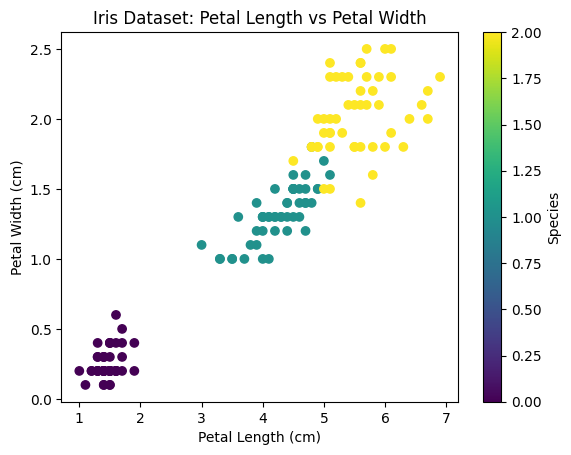

In [6]:
# Create a scatter plot
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], 
            c=iris.target, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset: Petal Length vs Petal Width')
plt.colorbar(label='Species')
plt.show()

In [7]:
# Create pair plots
iris_sns = sns.load_dataset("iris")

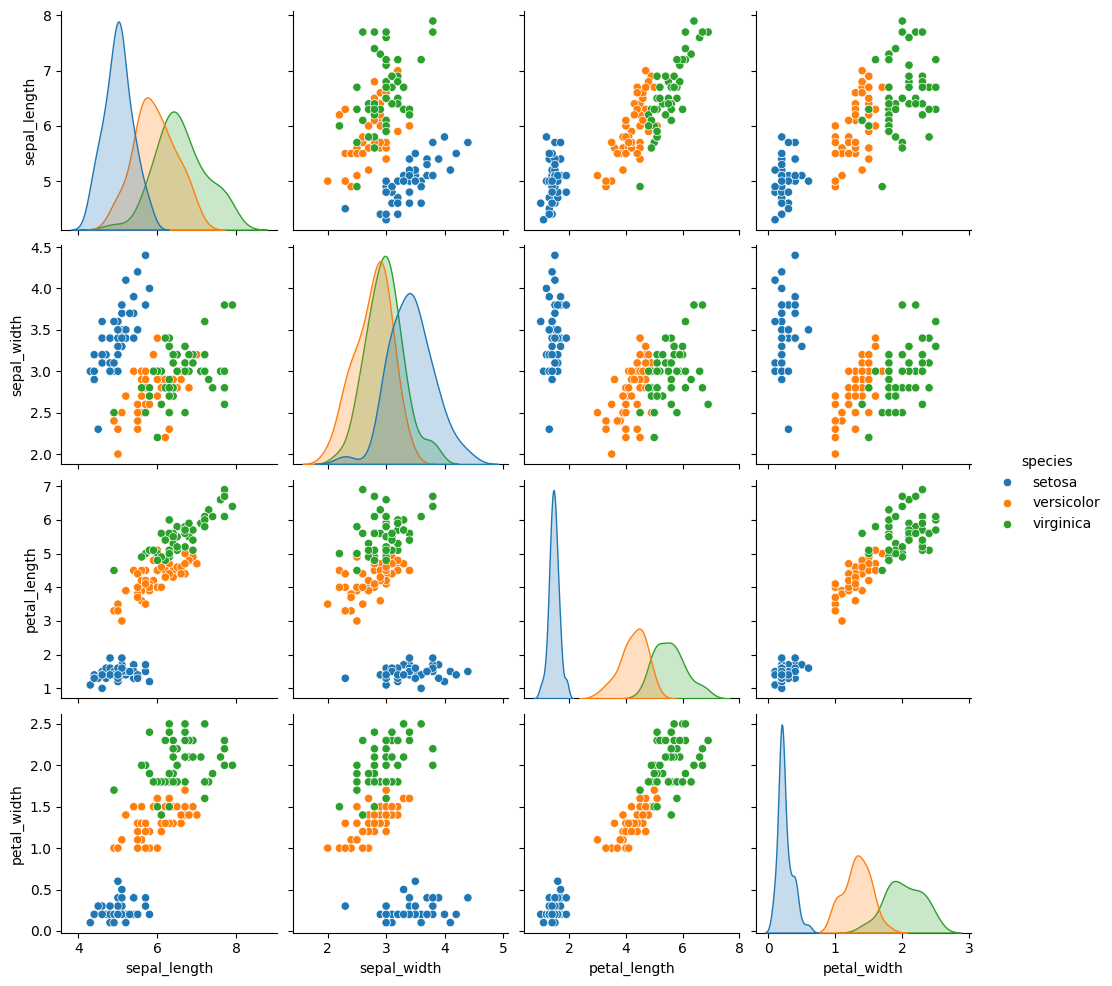

In [8]:
g = sns.pairplot(iris_sns, hue="species")

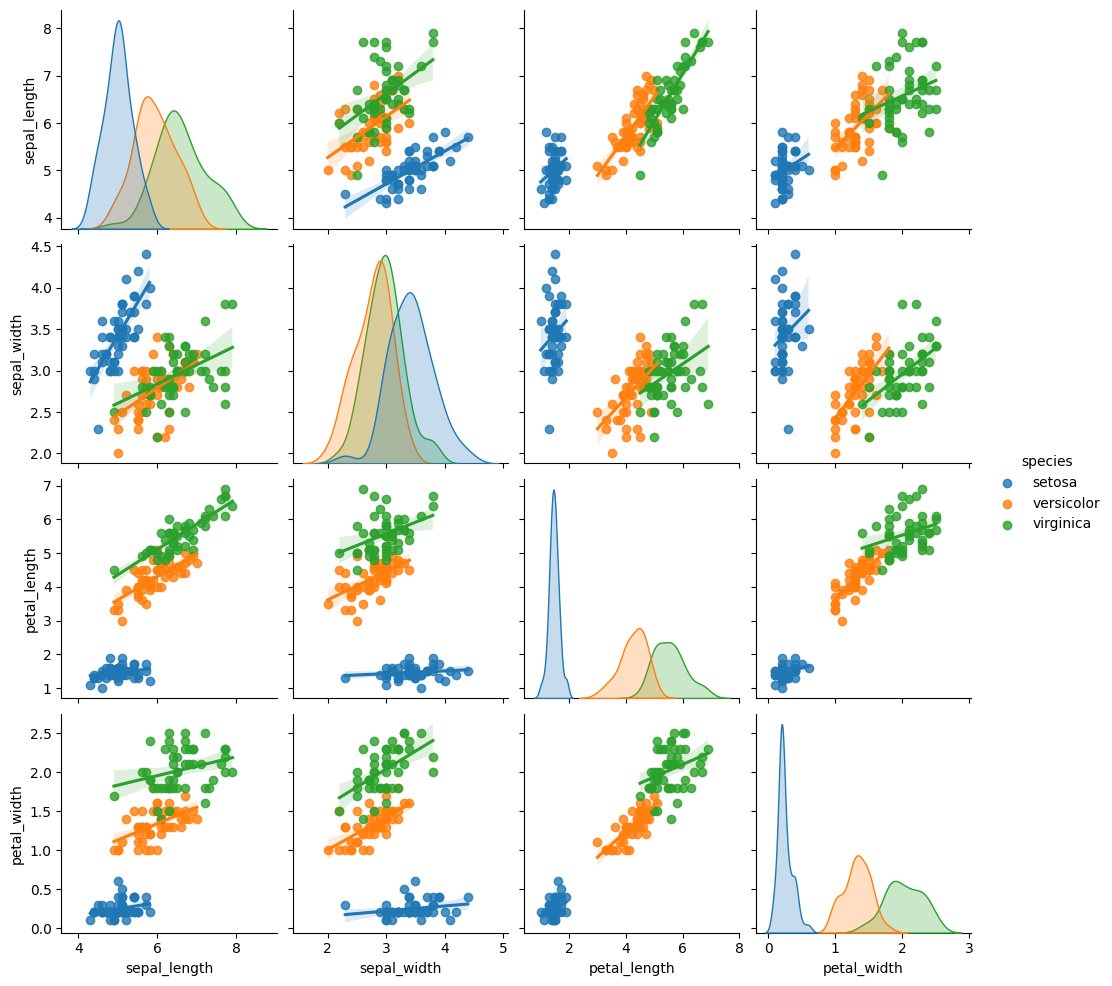

In [9]:
g = sns.pairplot(iris_sns, kind="reg", hue="species")

In [10]:
X = iris.data
y = iris.target

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors Algorithm

In [12]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the moel
y_pred = knn.predict(X_test)

Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

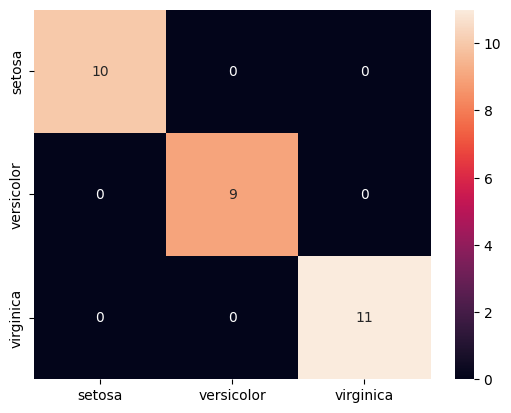

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)

# Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

import numpy as np
# Make predictions
y_pred = linear_reg.predict(X_test)

# Linear Regression outputs continous values, round it to get discrete classes
y_pred_rounded = np.round(y_pred).astype(int)

# Ensure predictions are within valid class range (0, 1, 2)
y_pred_rounded = np.clip(y_pred_rounded, 0, 2)

In [16]:
accuracy = accuracy_score(y_test, y_pred_rounded)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred_rounded, target_names=iris.target_names))

Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
cm = confusion_matrix(y_test, y_pred_rounded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xt)